## Análise de Redes de aeroportos

- Esse é o projeto da matéria Análise de Redes(2024.1) - IMD/UFRN
- O projeto consiste em uma análise de voos entre aeroportos dos Estados Unidos, com o obejtivo de:
    - Identificar os aeroportos mais conectados
    - Analisar a distribuição de rotas
    - Avaliar a conectividade da rede
    - Calcular diferentes métricas de centralidade para identificar aeroportos estratégicos
    - Determinar coeficientes de clustering para entender a coesão da rede
- Os dados foram extraídos do Kaggle: https://www.kaggle.com/datasets/tylerx/flights-and-airports-data/data

### Bases utilizadas:
- airports:
     - airport_id: Identificador único de cada aeroporto
     - city: Cidade do aeroporto
     - state: Estado do aeroporto
     - name: Nome do aeroporto
- fligths:
    - DayofMonth: Dia do mês do voo
    - DayOfWeek: Dia da semana do voo
    - Carrier: Empresa do voo
    - OriginAirportID: Identificador único do aeroporto de partida
    - DestAirportID: Identificador único do aeroporto de destino
    - DepDelay: Tempo de atraso na partida
    - ArrDelay: Tempo de atraso na chegada

 - Para melhor visualização e entendimento, trabalharemos com outra base criada a partir das duas fornecidas pelo kaggle usando os nomes dos aeroportos ao invés do ID
 - Os aeroportos serão os nós do nosso grafos e as rotas(conexões entre os aeroportos que indicam a existência de um voo direto entre dois pontos) as arestas

In [37]:
#Importando as bibliotecas
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pyvis.network as net
import streamlit as st

In [39]:
# Carregando os datasets
airports = pd.read_csv('../data/airports.csv')
flights = pd.read_csv('../data/flights_names.csv')

In [40]:
airports.head()

,airport_id,city,state,name
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport


In [41]:
flights.head()

,DayofMonth,DayOfWeek,Carrier,airport_id,DepDelay,ArrDelay,OriginAirport,DestAirport
0,19,5,DL,13303,-3,1,Detroit Metro Wayne County,Miami International
1,19,5,DL,12478,0,-8,Salt Lake City International,John F. Kennedy International
2,19,5,DL,14869,-4,-15,Portland International,Salt Lake City International
3,19,5,DL,11433,28,24,Lambert-St. Louis International,Detroit Metro Wayne County
4,19,5,DL,12892,-6,-11,Cincinnati/Northern Kentucky International,Los Angeles International


In [42]:
#Criando o grafo
G = nx.from_pandas_edgelist(flights, source='OriginAirport', target='DestAirport', create_using=nx.DiGraph())

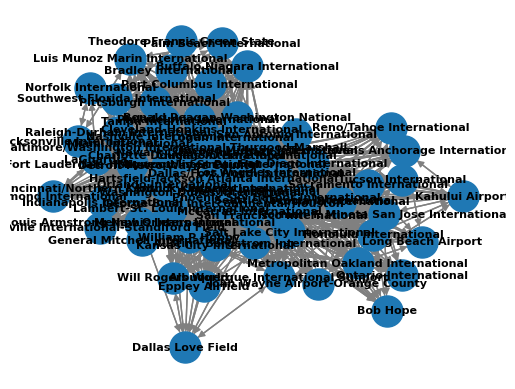

In [43]:
#Visualizando o grafo
pos = nx.spring_layout(G)

fig, ax = plt.subplots()

nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, font_color="black", font_weight="bold", edge_color="gray", ax=ax)

plt.show()

### Matriz de adjacência
- As linhas e colunas representam os nós (aeroportos) e as entradas indicam a existência de uma aresta (rota). Nesse caso, o valor 1 na célula (i, j) indica que existe um voo direto do aeroporto i para o aeroporto j

In [49]:
nx.adjacency_matrix(G).todense()

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

### Diâmetro e Periferia da Rede
- O diâmetro da rede representa a maior distância de voo necessária para viajar entre dois aeroportos, nesse caso ele é 3, o que significa que o voo mais longo, em termos de paradas, entre quaisquer dois aeroportos na rede, requer no máximo 3 conexões
- A periferia da rede representa os aeroportos com diâmetro igual a 3, são eles: Bob Hope(Califórnia), Kahului Airport(Havaí) e Dallas Love Field(Texas)

In [51]:
print(nx.eccentricity(G))
print("Diâmetro da Rede")
print(nx.diameter(G))

{'Detroit Metro Wayne County': 2, 'Miami International': 2, 'Salt Lake City International': 2, 'John F. Kennedy International': 2, 'Portland International': 2, 'Lambert-St. Louis International': 2, 'Cincinnati/Northern Kentucky International': 2, 'Los Angeles International': 2, 'Hartsfield-Jackson Atlanta International': 2, 'Austin - Bergstrom International': 2, 'Ronald Reagan Washington National': 2, 'Phoenix Sky Harbor International': 2, 'Minneapolis-St Paul International': 2, 'Dallas/Fort Worth International': 2, 'Jacksonville International': 2, 'LaGuardia': 2, 'San Francisco International': 2, 'Orlando International': 2, 'McCarran International': 2, 'Palm Beach International': 2, 'Memphis International': 2, 'Fort Lauderdale-Hollywood International': 2, 'Seattle/Tacoma International': 2, 'Denver International': 2, 'Sacramento International': 2, 'John Wayne Airport-Orange County': 2, 'Tampa International': 2, 'Kansas City International': 2, 'Charlotte Douglas International': 2, 'Phil

In [52]:
print("Periferia da Rede")
print(nx.periphery(G))

Periferia da Rede
['Kahului Airport', 'Dallas Love Field', 'Bob Hope']


### Esparsidade/Densidade da Rede 
- A densidade da rede indica o quão interconectada ela é. Nossa rede de aeroportos tem densidade de 0.52, o que significa que mais da metade das conexões possíveis entre aeroportos estão presentes, indicando uma boa conectividade, onde é relativamente fácil viajar de um aeroporto para outro, com muitas rotas diretas disponíveis ou com poucas conexões intermediárias necessárias.

In [54]:
density = nx.density(G)
print("Densidade da rede:", density)

# Determinar se a rede é esparsa ou densa
if density < 0.1:
    print("A rede é esparsa.")
else:
    print("A rede é densa.")

Densidade da rede: 0.5202898550724637
A rede é densa.


### Assortatividade da Rede
- Na nossa rede de aeroportos temos uma assortatividade negativa, o que significa que os nós de alto grau/hubs (aeroportos principais com muitas conexões) tendem a se conectar com nós de baixo grau (aeroportos menores com poucas conexões), é uma rede eficiente para distribuir passageiros e carga de grandes centros para áreas menores e vice-versa. No entanto, pode haver menos conexões diretas entre aeroportos menores, o que pode aumentar a necessidade de escalas em hubs principais. Em caso de falhas ou ataques direcionados aos hubs, a rede pode sofrer grandes interrupções.

In [56]:
assortativity_degree = nx.degree_assortativity_coefficient(G)
print("Assortatividade da rede:", assortativity_degree)

Assortatividade da rede: -0.25307314245688256


### Histograma de Distribuição Empírica de Grau
- Este histograma mostra a frequência de aeroportos em relação ao número de conexões que eles têm, revelando a distribuição de grau da rede, a visualização mostra a presença de aeroportos com um número muito alto de conexões e aeroportos com um número baixo de conexões

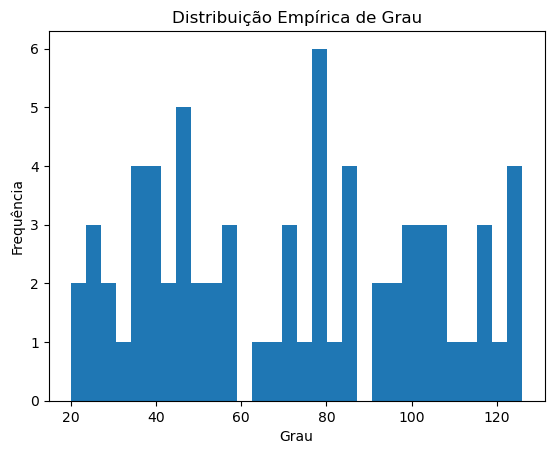

In [58]:
# Histograma de Distribuição Empírica de Grau
degree_hist = [d for n, d in G.degree()]
plt.hist(degree_hist, bins=30)
plt.title("Distribuição Empírica de Grau")
plt.xlabel("Grau")
plt.ylabel("Frequência")
plt.show()

- Os coeﬁciente de clustering local
    - Um alto coeficiente de clustering local para um aeroporto x indica que muitos dos aeroportos que têm voos diretos para x também têm voos diretos entre si
    - Valores Próximos de 1: Um valor de clustering local próximo de 1 indica que quase todos os vizinhos de um aeroporto estão interconectados
    - Valores Próximos de 0: Um valor de clustering local próximo de 0 indica que poucos ou nenhum dos vizinhos de um aeroporto estão conectados entre si.
- Coeﬁciente de clustering global
    - Um coeficiente de clustering global de 0.68 indica que há uma alta tendência de agrupamento na rede. Isso significa que, se um aeroporto x está conectado a dois outros aeroportos y e z, existe uma alta probabilidade (68%) de que y e z também estejam conectados entre si
- Componentes Conectados Fortemente
- Componentes Conectados Fracamente

In [60]:
# Calcular métricas adicionais
clustering_coefficient_local = nx.clustering(G)
clustering_coefficient_global = nx.transitivity(G)
weakly_connected = nx.weakly_connected_components(G)
strongly_connected = nx.strongly_connected_components(G)

# Exibir valores calculados
print("Coeficiente de Clustering Local:", clustering_coefficient_local)
print()
print("Coeficiente de Clustering Global:", clustering_coefficient_global)
print()
print("Componentes Conectados Fortemente:", list(strongly_connected))
print()
print("Componentes Conectados Fracamente:", list(weakly_connected))


Coeficiente de Clustering Local: {'Detroit Metro Wayne County': 0.681422351233672, 'Miami International': 0.7884615384615384, 'Salt Lake City International': 0.637372802960222, 'John F. Kennedy International': 0.5982532751091703, 'Portland International': 0.6891891891891891, 'Lambert-St. Louis International': 0.7774472687939427, 'Cincinnati/Northern Kentucky International': 0.8326923076923077, 'Los Angeles International': 0.6467505241090147, 'Hartsfield-Jackson Atlanta International': 0.568868407578085, 'Austin - Bergstrom International': 0.7823529411764706, 'Ronald Reagan Washington National': 0.77625, 'Phoenix Sky Harbor International': 0.5797779076563413, 'Minneapolis-St Paul International': 0.6146400483968542, 'Dallas/Fort Worth International': 0.5571126388154416, 'Jacksonville International': 0.8677536231884058, 'LaGuardia': 0.7174515235457064, 'San Francisco International': 0.6310763888888888, 'Orlando International': 0.6808163265306122, 'McCarran International': 0.58825248392752

In [61]:
print('Rede fortemente conectada?')
print(nx.is_strongly_connected(G))
print('Rede fracamente conectada?')
print(nx.is_weakly_connected(G))

Rede fortemente conectada?
True
Rede fracamente conectada?
True


### Medindo a importância dos nós
- Eigenvector centrality
- Degree centrality
- Closeness centrality
- Betweenness centrality

#### Eigenvector centrality
-  Aeroportos com valores altos de eigenvector centrality são altamente conectados a outros aeroportos igualmente importantes, fazendo deles pontos críticos na rede.
- Com essa medida vamos identificar aeroportos estrategicamente importantes em uma rede de aeroportos. Ele leva em conta não apenas quantas conexões um aeroporto tem, mas também a importância dos aeroportos aos quais ele está conectado

In [73]:
eigenvector_centrality = nx.eigenvector_centrality(G)

In [75]:
sorted_ec = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)
top_ec = sorted_ec[:10]
print(f"Top 10 nós por eigenvector centrality:", top_ec)

Top 10 nós por eigenvector centrality: [('Hartsfield-Jackson Atlanta International', 0.17673601996011273), ('Denver International', 0.1733883057531402), ('Dallas/Fort Worth International', 0.17265327039864026), ("Chicago O'Hare International", 0.17130173239270882), ('Minneapolis-St Paul International', 0.1688854957086896), ('George Bush Intercontinental/Houston', 0.16785556700172347), ('McCarran International', 0.16739796171145643), ('Phoenix Sky Harbor International', 0.16560146371471238), ('Charlotte Douglas International', 0.16523268572347127), ('Newark Liberty International', 0.16302838957569166)]


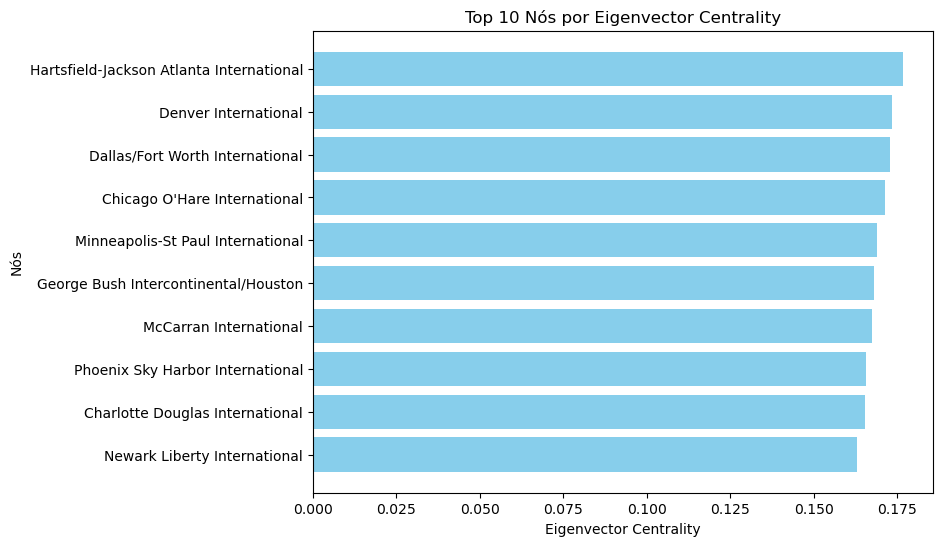

In [81]:
nodes = [item[0] for item in top_ec]
centrality_values = [item[1] for item in top_ec]

# Criando o gráfico de barras horizontais
plt.figure(figsize=(8, 6))
plt.barh(nodes, centrality_values, color='skyblue')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Nós')
plt.title('Top 10 Nós por Eigenvector Centrality')
plt.gca().invert_yaxis()
plt.show()

#### Degree centrality
- O Degree Centrality (Centralidade de Grau) mede o grau de um nó, ou seja, quantos vizinhos (conexões diretas) ele tem
- Aeroportos com alta centralidade de grau são considerados hubs principais, pois têm muitas conexões diretas com outros aeroportos

In [83]:
degree_centrality = nx.degree_centrality(G)

In [85]:
sorted_dc = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)
top_dc = sorted_dc[:10]
print(f"Top 10 nós por degree centrality:", top_dc)

Top 10 nós por degree centrality: [('Hartsfield-Jackson Atlanta International', 1.8260869565217392), ('Dallas/Fort Worth International', 1.7971014492753623), ('Denver International', 1.7971014492753623), ("Chicago O'Hare International", 1.7826086956521738), ('George Bush Intercontinental/Houston', 1.7391304347826086), ('Phoenix Sky Harbor International', 1.710144927536232), ('McCarran International', 1.710144927536232), ('Minneapolis-St Paul International', 1.681159420289855), ('Newark Liberty International', 1.6376811594202898), ('Charlotte Douglas International', 1.5942028985507246)]


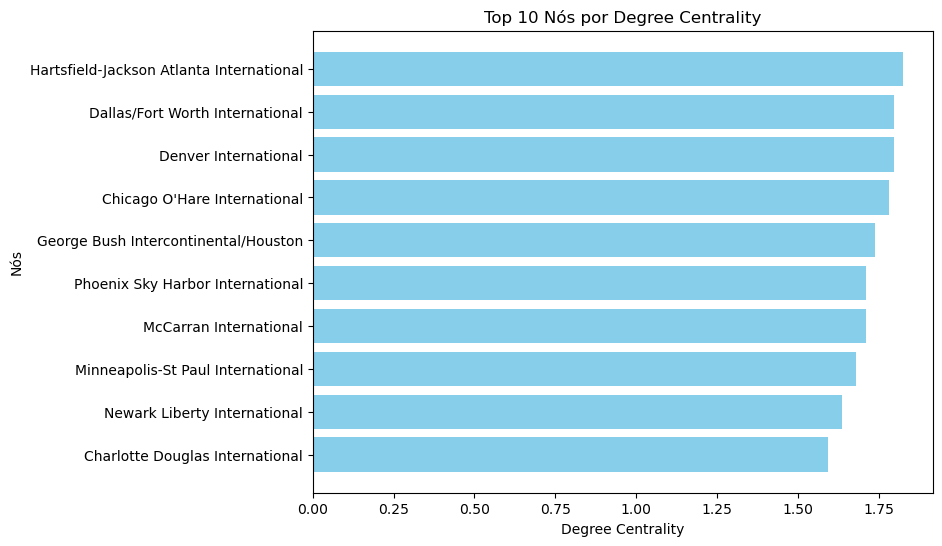

In [89]:
nodes = [item[0] for item in top_dc]
centrality_values = [item[1] for item in top_dc]

# Criando o gráfico de barras horizontais
plt.figure(figsize=(8, 6))
plt.barh(nodes, centrality_values, color='skyblue')
plt.xlabel('Degree Centrality')
plt.ylabel('Nós')
plt.title('Top 10 Nós por Degree Centrality')
plt.gca().invert_yaxis()
plt.show()

#### Closeness centrality
- O Closeness Centrality avalia o quão perto um nó (aeroporto) está de todos os outros nós na rede, mede a rapidez com que uma viagem pode se espalhar a partir de um nó para todos os outros na rede
- Os aeroportos com alta centralidade de proximidade são, em média, mais próximos de todos os outros aeroportos, indicando que eles são pontos eficientes para distribuir voos e passageiros

In [91]:
closeness_centrality = nx.closeness_centrality(G)

In [93]:
sorted_cc = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)
top_cc = sorted_cc[:10]
print(f"Top 10 nós por closeness centrality:", top_cc)

Top 10 nós por closeness centrality: [('Hartsfield-Jackson Atlanta International', 0.92), ('Dallas/Fort Worth International', 0.9078947368421053), ('Denver International', 0.9078947368421053), ("Chicago O'Hare International", 0.8961038961038961), ('George Bush Intercontinental/Houston', 0.8846153846153846), ('Phoenix Sky Harbor International', 0.8734177215189873), ('McCarran International', 0.8734177215189873), ('Minneapolis-St Paul International', 0.8625), ('Newark Liberty International', 0.8414634146341463), ('John F. Kennedy International', 0.8313253012048193)]


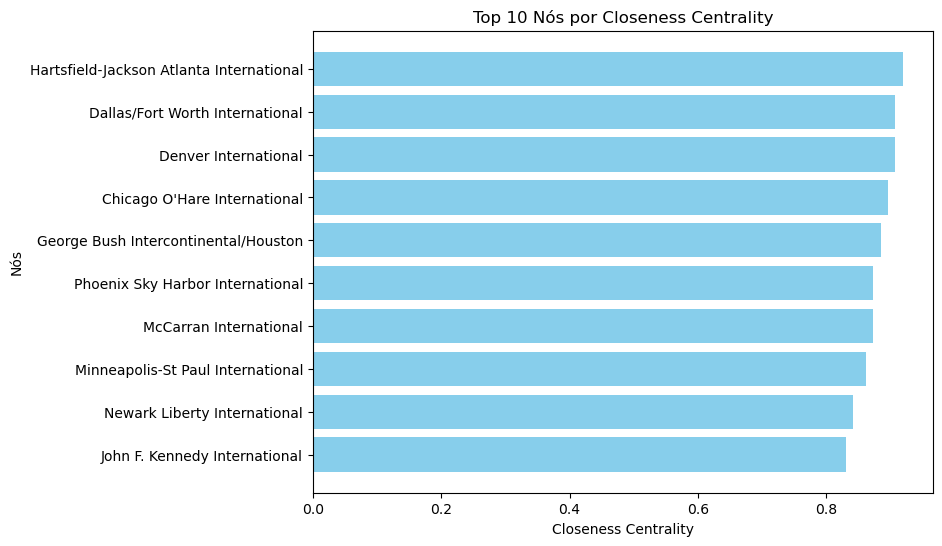

In [97]:
nodes = [item[0] for item in top_cc]
centrality_values = [item[1] for item in top_cc]

# Criando o gráfico de barras horizontais
plt.figure(figsize=(8, 6))
plt.barh(nodes, centrality_values, color='skyblue')
plt.xlabel('Closeness Centrality')
plt.ylabel('Nós')
plt.title('Top 10 Nós por Closeness Centrality')
plt.gca().invert_yaxis()
plt.show()

#### Betweenness centrality
- O betweenness centrality identifica a importância de um nó como ponte ou intermediário na comunicação de aeroportos, medindo quantas vezes um nó age como um ponto de passagem para a comunicação entre outros nós
- Aeroportos com alta centralidade de intermediação são essenciais para a conectividade da rede, pois muitos caminhos de rotas passam por eles. Eles são frequentemente a ligação entre diferentes partes da rede

In [99]:
betweenness_centrality = nx.betweenness_centrality(G)

In [101]:
sorted_bc = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)
top_bc = sorted_bc[:10]
print(f"Top 10 nós por betweenness centrality:", top_bc)

Top 10 nós por betweenness centrality: [('Denver International', 0.029825141780960757), ('Dallas/Fort Worth International', 0.029481541880603725), ('Hartsfield-Jackson Atlanta International', 0.02903778352212746), ('George Bush Intercontinental/Houston', 0.028829697070273497), ("Chicago O'Hare International", 0.026396526493047783), ('Phoenix Sky Harbor International', 0.025602715446013762), ('McCarran International', 0.023858722642235448), ('John F. Kennedy International', 0.02067271166684944), ('Chicago Midway International', 0.019701420684818005), ('Minneapolis-St Paul International', 0.017535638149935844)]


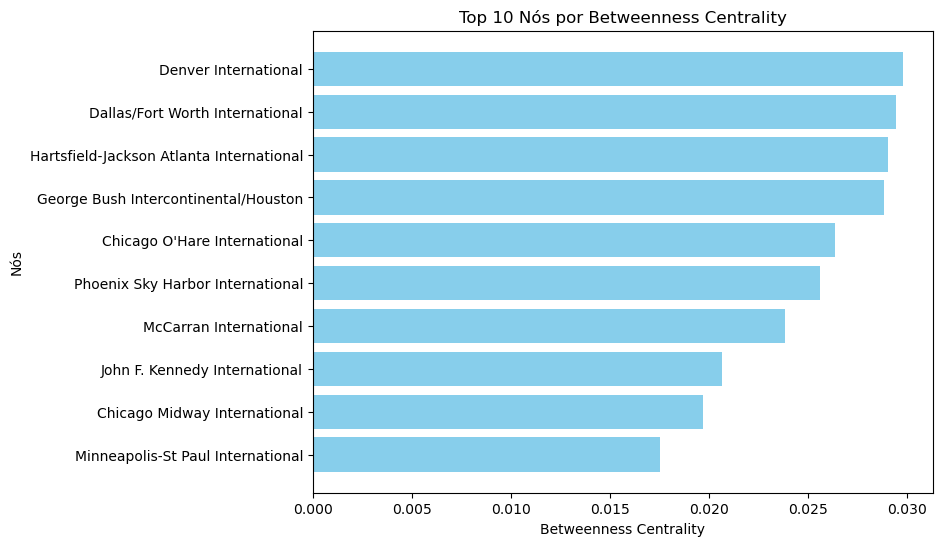

In [103]:
nodes = [item[0] for item in top_bc]
centrality_values = [item[1] for item in top_bc]

# Criando o gráfico de barras horizontais
plt.figure(figsize=(8, 6))
plt.barh(nodes, centrality_values, color='skyblue')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Nós')
plt.title('Top 10 Nós por Betweenness Centrality')
plt.gca().invert_yaxis()
plt.show()